In [1]:
import pandas as pd

In [2]:
import numpy as np

In [176]:
%matplotlib inline
import matplotlib.pylab as plt
import seaborn as sns

In [4]:
from IPython.core.display import HTML
css = open('other/style-table.css').read() + open('other/style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

# What Needs To Be Done in Wrangling

1. [X] Import datasets
2. [X] Remove un-needed columns (for visual simplification)
3. [X] Remove character '$' so that forced objects can be converted to numeric
  1. [X] Convert forced objects to numeric (where appropriate)
4. [ ] To Be Done before datasets can be combined
  1. [ ] SF's EmployeeName column needs to be split into two columns to match NYC's ds.
  2. [ ] NYC's 'Agency Name' need to remove reference to Bouroughs or i.e. #X
  3. [ ] LA's 'Department Title' need to remove i.e. (CD X)
  4. [ ] I would like to combine the titles between datasets as much as I possibly can.
5. [ ] Create combined dataset
6. [ ] Perform analysis on seperate and combined datasets

# What Needs To Be Done in Data Visualization

* [ ] Describe each dataset
* [ ] Compare Male and Female salaries
* [ ] Compare Male and Female salaries taking length of service into consideration

# Here we compare the fields between the three datasets
![Field Compairson](FieldComparison.png)

In [5]:
# Load Los Angelos salaries dataset from Kaggle
la = pd.read_csv('data/city-payroll-data/data.csv', usecols=[0,1,2,4,5,6,7,15,21,23,24,25,32], dtype={4: object, 24: object})

In [106]:
# Load San Francisco salaries dataset from Kaggle
sf = pd.read_csv('data/sf-salaries/Salaries.csv', usecols=[0,1,2,3,4,5,6,7,9,11,12], dtype={3: object, 4: object, 5: object, 6: object, 12: object}, na_values=['Not Provided', 'Not provided', 'not provided'])

In [107]:
# This is to be utilized later so that I could learn how to import SQLite tables.
# sf_sql = pd.read_sql_table('Salaries','data/sf-salaries/database.sqlite')

In [108]:
# Load New York City salaries dataset from OpenData
nyc = pd.read_csv('data/nyc/Citywide_Payroll_Data__Fiscal_Year_.csv', dtype={7: object})

In [109]:
la.head()

,Row ID,Year,Department Title,Record Number,Job Class Title,Employment Type,Hourly or Event Rate,Total Payments,Overtime Pay,Other Pay (Payroll Explorer),MOU,MOU Title,Average Benefit Cost
0,111391,2014,Water And Power (DWP),1412316577,Commercial Service Representative,Full Time,NaN,74584.48,369.12,13904.79,NaN,NaN,18124.69
1,31732,2013,Police (LAPD),432728338,Police Officer I,Full Time,25.12,51207.45,11.13,1689.27,24,POLICE OFFICERS UNIT,12740.52
2,27697,2013,Police (LAPD),97182506,Police Officer II,Full Time,42.77,89029.61,482.29,3637.91,24,POLICE OFFICERS UNIT,12740.52
3,14136,2013,Harbor (Port of LA),950136941,Senior Security Officer,Full Time,28.75,71936.24,11504.72,2770.72,12,SUPV BLUE COLLAR,11126.88
4,91896,2014,Public Works - Sanitation,3230003445,Senior Clerk Typist,Full Time,30.92,64583.37,417.37,4774.25,03,CLERICAL UNIT,11421.48


In [110]:
# Removing columns which I do not intend to use for this analysis
# la.drop(la.columns[[3, 8, 9, 10, 11, 12, 13, 14, 16, 26, 27, 28, 29, 30, 31, 33, 34]], axis=1)

In [111]:
# Removing the $ character so that the type can be converted to numeric for further statistical anaslysis
la['Hourly or Event Rate'] = la['Hourly or Event Rate'].str.lstrip('$')
la['Total Payments'] = la['Total Payments'].str.lstrip('$')
la['Overtime Pay'] = la['Overtime Pay'].str.lstrip('$')
la['Other Pay (Payroll Explorer)'] = la['Other Pay (Payroll Explorer)'].str.lstrip('$')
la['Average Benefit Cost'] = la['Average Benefit Cost'].str.lstrip('$')

AttributeError: Can only use .str accessor with string values, which use np.object_ dtype in pandas

In [ ]:
# Converting datatypes to numeric for statistical analysis
la['Total Payments'] = pd.to_numeric(la['Total Payments'])
la['Hourly or Event Rate'] = pd.to_numeric(la['Hourly or Event Rate'])
la['Total Payments'] = pd.to_numeric(la['Total Payments'])
la['Overtime Pay'] = pd.to_numeric(la['Overtime Pay'])
la['Other Pay (Payroll Explorer)'] = pd.to_numeric(la['Other Pay (Payroll Explorer)'])
la['Average Benefit Cost'] = pd.to_numeric(la['Average Benefit Cost'])

In [ ]:
la.dtypes

In [112]:
la.describe()

,Row ID,Year,Hourly or Event Rate,Total Payments,Overtime Pay,Other Pay (Payroll Explorer),Average Benefit Cost
count,285008.000000,285008.000000,263987.000000,285008.000000,284574.000000,285008.000000,285008.000000
mean,142544.329759,2014.786701,38.891489,63014.632040,6387.454101,4983.182752,11290.999867
std,82330.135857,1.161369,32.924956,48666.570776,14670.314425,8719.631894,5708.016753
min,1.000000,2013.000000,0.000000,-30728.270000,-1019.490000,-30878.270000,0.000000
25%,71252.750000,2014.000000,26.480000,22930.745000,0.000000,389.027500,11126.880000
50%,142504.500000,2015.000000,37.310000,54959.080000,331.085000,2418.435000,11894.130000
75%,213756.250000,2016.000000,47.630000,95981.917500,5860.485000,6145.220000,14073.960000
max,285208.000000,2016.000000,900.000000,500930.740000,311315.620000,435621.770000,19392.620000


## Start with San Francisco salaries dataset

In [113]:
sf.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,Year,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.0,400184.25,NaN,567595.43,2011,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,2011,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.6,NaN,335279.91,2011,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.0,56120.71,198306.9,NaN,332343.61,2011,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.6,9737.0,182234.59,NaN,326373.19,2011,San Francisco,NaN


In [114]:
# Converting datatypes to numeric for statistical analysis
sf['BasePay'] = pd.to_numeric(sf['BasePay'])
sf['OvertimePay'] = pd.to_numeric(sf['OvertimePay'])
sf['OtherPay'] = pd.to_numeric(sf['OtherPay'])
sf['Benefits'] = pd.to_numeric(sf['Benefits'])

In [115]:
sf.dtypes

Id                int64
EmployeeName     object
JobTitle         object
BasePay         float64
OvertimePay     float64
OtherPay        float64
Benefits        float64
TotalPay        float64
Year              int64
Agency           object
Status           object
dtype: object

In [116]:
sf.describe()

,Id,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,Year
count,148654.000000,148045.000000,148650.000000,148650.000000,112491.000000,148654.000000,148654.000000
mean,74327.500000,66325.448840,5066.059886,3648.767297,25007.893151,74768.321972,2012.522643
std,42912.857795,42764.635495,11454.380559,8056.601866,15402.215858,50517.005274,1.117538
min,1.000000,-166.010000,-0.010000,-7058.590000,-33.890000,-618.130000,2011.000000
25%,37164.250000,33588.200000,0.000000,0.000000,11535.395000,36168.995000,2012.000000
50%,74327.500000,65007.450000,0.000000,811.270000,28628.620000,71426.610000,2013.000000
75%,111490.750000,94691.050000,4658.175000,4236.065000,35566.855000,105839.135000,2014.000000
max,148654.000000,319275.010000,245131.880000,400184.250000,96570.660000,567595.430000,2014.000000


# Staring with New York City salaries dataset

In [117]:
nyc.head()

,Fiscal Year,Payroll Number,Agency Name,Last Name,First Name,Mid Init,Agency Start Date,Work Location Borough,Title Description,Leave Status as of July 31,Base Salary,Pay Basis,Regular Hours,Regular Gross Paid,OT Hours,Total OT Paid,Total Other Pay
0,2014,2.0,OFFICE OF THE MAYOR,MULLEN,ALFRED,J,03/20/1972,NaN,CALENDAR ASSISTANT ...,ON SEPARATION LEAVE,$83325.00,per Annum,1825.0,$83096.78,0.0,$228.03,$0.00
1,2014,2.0,OFFICE OF THE MAYOR,GARRETT,CORNELIUS,S,09/25/1976,NaN,FISCAL RESPONSIBILITY OFFICER ...,ON SEPARATION LEAVE,$70985.00,per Annum,1825.0,$70790.46,10.5,$845.07,$0.00
2,2014,2.0,OFFICE OF THE MAYOR,LEONARD,DIANE,M,11/22/1977,NaN,EXECUTIVE ASSISTANT-MIDTOWN ENFORCEMENT ...,ACTIVE,$40.51,per Hour,1573.0,$63165.38,0.0,$0.00,$0.00
3,2014,2.0,OFFICE OF THE MAYOR,ROSS,JEAN,A,07/01/1978,NaN,ADMINISTRATIVE MANAGER ...,ACTIVE,$125715.00,per Annum,1825.0,$125370.69,0.0,$0.00,$0.00
4,2014,2.0,OFFICE OF THE MAYOR,WEINSTOCK,SUSAN,NaN,07/01/1978,NaN,ADMINISTRATIVE PRINTING SERVICES MANAGER ...,ACTIVE,$84500.00,per Annum,1825.0,$84268.60,0.0,$0.00,$0.00


In [118]:
# Removing columns I do not intend to use
nyc = nyc.drop(nyc.columns[[1,7,10]], axis=1)

In [119]:
nyc.head()

,Fiscal Year,Agency Name,Last Name,First Name,Mid Init,Agency Start Date,Title Description,Leave Status as of July 31,Pay Basis,Regular Hours,Regular Gross Paid,OT Hours,Total OT Paid,Total Other Pay
0,2014,OFFICE OF THE MAYOR,MULLEN,ALFRED,J,03/20/1972,CALENDAR ASSISTANT ...,ON SEPARATION LEAVE,per Annum,1825.0,$83096.78,0.0,$228.03,$0.00
1,2014,OFFICE OF THE MAYOR,GARRETT,CORNELIUS,S,09/25/1976,FISCAL RESPONSIBILITY OFFICER ...,ON SEPARATION LEAVE,per Annum,1825.0,$70790.46,10.5,$845.07,$0.00
2,2014,OFFICE OF THE MAYOR,LEONARD,DIANE,M,11/22/1977,EXECUTIVE ASSISTANT-MIDTOWN ENFORCEMENT ...,ACTIVE,per Hour,1573.0,$63165.38,0.0,$0.00,$0.00
3,2014,OFFICE OF THE MAYOR,ROSS,JEAN,A,07/01/1978,ADMINISTRATIVE MANAGER ...,ACTIVE,per Annum,1825.0,$125370.69,0.0,$0.00,$0.00
4,2014,OFFICE OF THE MAYOR,WEINSTOCK,SUSAN,NaN,07/01/1978,ADMINISTRATIVE PRINTING SERVICES MANAGER ...,ACTIVE,per Annum,1825.0,$84268.60,0.0,$0.00,$0.00


In [120]:
nyc['Regular Gross Paid'] = nyc['Regular Gross Paid'].str.lstrip('$')
nyc['Total OT Paid'] = nyc['Total OT Paid'].str.lstrip('$')
nyc['Total Other Pay'] = nyc['Total Other Pay'].str.lstrip('$')

In [121]:
nyc['Regular Gross Paid'] = pd.to_numeric(nyc['Regular Gross Paid'])
nyc['Total OT Paid'] = pd.to_numeric(nyc['Total OT Paid'])
nyc['Total Other Pay'] = pd.to_numeric(nyc['Total Other Pay'])

In [122]:
nyc.dtypes

Fiscal Year                     int64
Agency Name                    object
Last Name                      object
First Name                     object
Mid Init                       object
Agency Start Date              object
Title Description              object
Leave Status as of July 31     object
Pay Basis                      object
Regular Hours                 float64
Regular Gross Paid            float64
OT Hours                      float64
Total OT Paid                 float64
Total Other Pay               float64
dtype: object

In [123]:
nyc.describe()

,Fiscal Year,Regular Hours,Regular Gross Paid,OT Hours,Total OT Paid,Total Other Pay
count,1.691487e+06,1.691486e+06,1.691486e+06,1.691486e+06,1.691486e+06,1.691486e+06
mean,2.015021e+03,7.022911e+02,3.996266e+04,6.443838e+01,3.440764e+03,2.302203e+03
std,7.892326e-01,9.041001e+02,3.665592e+04,1.519441e+02,8.886150e+03,5.083747e+03
min,2.014000e+03,-7.304300e+02,-2.986219e+04,-8.000000e+00,-2.382685e+04,-2.815950e+05
25%,2.014000e+03,0.000000e+00,3.651787e+03,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.015000e+03,0.000000e+00,3.518840e+04,0.000000e+00,0.000000e+00,8.200000e-01
75%,2.016000e+03,1.825000e+03,7.172129e+04,8.000000e+00,4.109350e+02,1.686587e+03
max,2.016000e+03,4.171430e+03,6.723089e+05,3.347500e+03,2.286338e+05,1.003558e+05


# Begin comparison between datasets

## We first look at the size of all datasets

In [124]:
len(sf)

148654

In [125]:
len(la)

285008

In [126]:
len(nyc)

1691487

## Secondly we compare the years which are represented in the datasets

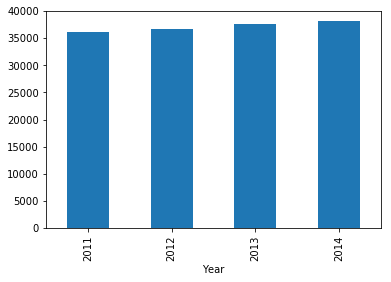

In [127]:
sf.groupby('Year').size().plot(kind='bar')

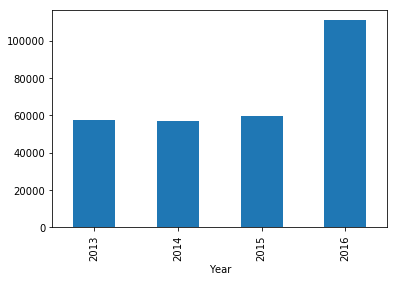

In [128]:
la.groupby('Year').size().plot(kind='bar')

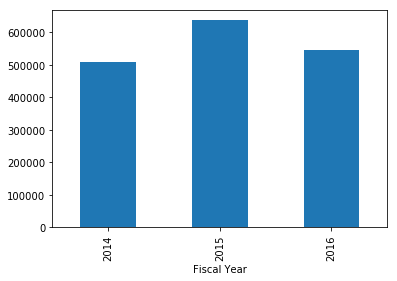

In [129]:
nyc.groupby('Fiscal Year').size().plot(kind='bar')

## Comapring Departments and Job Titles

In [132]:
la.groupby('Department Title').size().sort_values().tail(10)

Department Title
Harbor (Port of LA)           5604
Library                       7296
General Services              7661
Transportation (LADOT)        9701
Public Works - Sanitation    14740
Airports (LAWA)              18060
Fire (LAFD)                  18134
Recreation And Parks         35344
Water And Power (DWP)        53545
Police (LAPD)                66057
dtype: int64

In [133]:
sf.groupby('JobTitle').size().sort_values().tail(10)

JobTitle
Patient Care Assistant          1945
Recreation Leader               1971
Firefighter                     2359
TRANSIT OPERATOR                2388
Custodian                       2418
Police Officer 3                2421
Public Svc Aide-Public Works    2518
Registered Nurse                3736
Special Nurse                   4389
Transit Operator                7036
dtype: int64

In [134]:
nyc.groupby('Agency Name').size().sort_values().tail(10)

Agency Name
FIRE DEPARTMENT                    53869
DEPT OF PARKS & RECREATION         54941
Police Department                  55619
POLICE DEPARTMENT                  59974
DEPT OF ED HRLY SUPPORT STAFF      74787
DEPT OF ED PARA PROFESSIONALS      92388
BOARD OF ELECTION POLL WORKERS     95357
POLICE DEPARTMENT                 124422
DEPT OF ED PER SESSION TEACHER    244375
DEPT OF ED PEDAGOGICAL            318709
dtype: int64

In [179]:
la.dtypes

Row ID                            int64
Year                              int64
Department Title                 object
Record Number                    object
Job Class Title                  object
Employment Type                  object
Hourly or Event Rate            float64
Total Payments                  float64
Overtime Pay                    float64
Other Pay (Payroll Explorer)    float64
MOU                              object
MOU Title                        object
Average Benefit Cost            float64
dtype: object

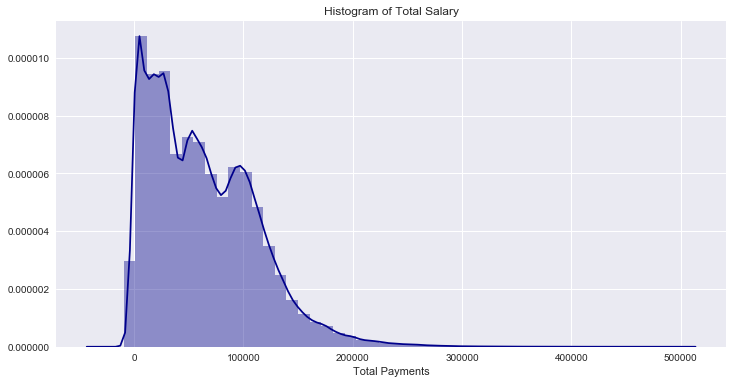

In [188]:
plt.figure(figsize = (12,6))
plt.title("Histogram of Total Salary")
sns.distplot(la['Total Payments'], color = 'darkblue')

# -- TO DO : CLEAN UP NAMES (START) --

In [137]:
# We need to split the names into two columns
sf.EmployeeName.head()

0       NATHANIEL FORD
1         GARY JIMENEZ
2       ALBERT PARDINI
3    CHRISTOPHER CHONG
4      PATRICK GARDNER
Name: EmployeeName, dtype: object

In [171]:
#sf.EmployeeName = 
# Here we see that some names are rather long and will need further processing to fit into two columns.
sf_names = sf.EmployeeName.str.split(' ', expand=True).sort_values(by=5)

# .iloc[rows,columns]
sf_names.iloc[0:5,0:6]

,0,1,2,3,4,5
97527,Grace,De,La,Cruz,,Alano
90015,Vidalia,Irene,,Cordon,De,Galvez
142550,Dina,C,"Smith,","Msw,",Catc,Iv
108183,Cesar,L,De,La,Parra,Jr
140213,Cesar,L,De,La,Parra,Jr


# -- TO DO : CLEAN UP NAMES (END) --